<a href="https://colab.research.google.com/github/smlra-kjsce/Cyber-ML-DL-101/blob/master/Introduction_to_ML_Session_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

####While we used linear regression to deal with continuous data, that helped in predicting a future value on the basis of past data, logistic regression is different. Logsitic regression is used when the dependent variable is dichotomous (binary). For example: positive-negative, 0-1, pass-fail, benign-malignant, etc. It is assumed that the data for such dichotomous nature would be independent and that there's no correlation of data between two classes.
![alt text](https://miro.medium.com/max/1000/1*UgYbimgPXf6XXxMy2yqRLw.png)

Many will think, why not linear regression? That's because linear data plotted on graph may look something like this:


<figure>
<center>
<img src='https://drive.google.com/uc?id=192bLivyYTXRLQaJsG8h-8jphieelQ-HX'/>
  </center>
  <center><figcaption><b>Linear Regression to fit dichotomous data</b></figcaption></center>
</figure>

But what if we are faced with data having outlier points? 

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Bk_tgAS1gMjEKqh6CVo6iZ3vNYzLf6Hx'/>
  </center>
  <center><figcaption><b>Linear Regression to fit dichotomous data with outliers</b></figcaption></center>
</figure>

It is clearly visible that the line shifts just because of one outlier. This increases confusion of the model. 

Hence, Logistic regression is used.

In logistic regression, we use logistic functions that are used to plot probabilistic models. 

Sigmoid function is a logistic function that's used in logistic regression. This is how it looks: 


<figure>
<center>
<img src='https://drive.google.com/uc?id=1ro0WaW1kszK3InLQNVoKAoFD9K370REO'/>
  </center>
  <center><figcaption><b>Sigmoid function</b></figcaption></center>
</figure>

### Let's plot this graph using Python.

In [0]:
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

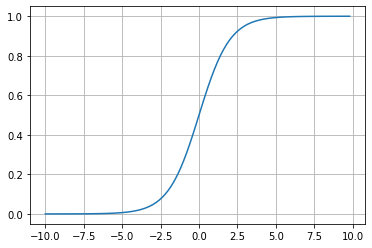

In [0]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.grid(True)
plt.show()

***Analysis of the hypothesis***





The output from the hypothesis is the estimated probability. This is used to infer how confident can predicted value be actual value when given an input X. 

Consider the below example,


X = [x0 x1] = [1 IP-Address]


Based on the x1 value, let’s say we obtained the estimated probability to be 0.8. This tells that there is 80% chance that an email will be spam.
Mathematically this can be written as,



![alt text](https://miro.medium.com/max/685/1*i_QQvUzXCETJEelf4mLx8Q.png)


This justifies the name ‘logistic regression’. Data is fit into linear regression model, which then be acted upon by a logistic function predicting the target categorical dependent variable.

***Cost Function***

![alt text](https://miro.medium.com/max/1023/1*ueEwU1dE0Yu-KpMJanf9AQ.png)


![alt text](https://miro.medium.com/max/2400/1*r7fhk417IOuq7meXIctGXg.jpeg)


![alt text](https://miro.medium.com/max/2360/1*pJEi5f4gdVGezYev9MChBw.jpeg)

### As an example, we will start working on the portmap dataset hosted on unb.ca. This example will also help us understand some data pre processing and how to draw inference and make next steps.



In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#test_df = pd.read_csv("/content/drive/My Drive/ML-DL101 Datasets/test_titanic.csv")
#train_df = pd.read_csv("/content/drive/My Drive/ML-DL101 Datasets/train_titanic.csv")
dataset = pd.read_csv("/content/drive/My Drive/dataset/portmap/Portmap.csv")

In [0]:
#train_df.info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191694 entries, 0 to 191693
Data columns (total 88 columns):
Unnamed: 0                      191694 non-null int64
Flow ID                         191694 non-null object
 Source IP                      191694 non-null object
 Source Port                    191694 non-null int64
 Destination IP                 191694 non-null object
 Destination Port               191694 non-null int64
 Protocol                       191694 non-null int64
 Timestamp                      191694 non-null object
 Flow Duration                  191694 non-null int64
 Total Fwd Packets              191694 non-null int64
 Total Backward Packets         191694 non-null int64
Total Length of Fwd Packets     191694 non-null float64
 Total Length of Bwd Packets    191694 non-null float64
 Fwd Packet Length Max          191694 non-null float64
 Fwd Packet Length Min          191694 non-null float64
 Fwd Packet Length Mean         191694 non-null float64
 Fwd Packet

In [0]:
#train_df.describe()
dataset.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,191694.000000,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,191694.000000,191694.000000,191694.000000,191694.000000,191694.000000,191694.000000,191694.000000,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,191694.000000,191694.000000,191694.0,191694.0,191694.0,1.916940e+05,191694.000000,1.916940e+05,191694.000000,191694.000000,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.0,191694.000000,191694.000000,191694.0,191694.000000,191694.000000,191694.000000,191694.0,191694.000000,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.0,191694.0,191694.0,191694.0,191694.0,191694.0,191694.000000,191694.000000,191694.000000,1.916940e+05,191694.000000,191694.000000,191694.000000,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,1.916940e+05,191694.000000
mean,95846.500000,2088.157068,32152.417843,16.799915,3.429798e+05,2.269868,0.381493,470.704451,4.068446e+02,228.300849,224.591557,225.243832,1.144197,7.475190,0.891332,2.587391,1.992043,1.044460e+04,2.853777e+04,1.336233e+05,1.150827e+03,3.348073e+05,1.483022e+04,3.561602e+04,1.292838e+05,1.095812e+03,2.830445e+05,1.016053e+04,2.799858e+04,1.101753e+05,0.050064,0.003579,0.0,0.0,0.0,-1.974155e+07,8.296514,1.545580e+06,132.388594,224.586085,232.574134,226.066404,2.241174,1.138540e+03,0.0,0.000099,0.003579,0.0,0.006985,0.010501,0.005420,0.0,0.024967,338.313227,225.243832,2.587391,-1.974155e+07,0.0,0.0,0.0,0.0,0.0,0.0,2.269868,470.704451,0.381493,4.068446e+02,158.514476,75.769977,1.212344,-9.895723e+06,3.125842e+03,1.714300e+03,5.498896e+03,2.033322e+03,1.178584e+05,7.717813e+03,1.256591e+05,1.110960e+05,0.977146
std,55337.435588,8566.647296,19319.329351,1.485127,5.957307e+06,46.812214,72.545552,684.066594,1.335419e+05,74.193653,44.974246,43.581375,21.387575,121.292776,10.021348,38.105423,36.204818,2.785645e+05,5.496378e+05,2.525060e+06,1.714015e+05,5.947151e+06,3.391537e+05,7.018930e+05,2.522004e+06,1.713639e+05,5.472420e+06,2.192997e+05,5.992762e+05,2.360119e+06,0.748235,0.059715,0.0,0.0,0.0,2.037571e+08,1452.203358,7.884703e+05,7395.210834,44.999130,122.137726,44.652561,33.667832,2.403452e+04,0.0,0.009955,0.059715,0.0,0.083285,0.101936,0.073422,0.0,0.217886,65.186554,43.581375,38.105423,2.037571e+08,0.0,0.0,0.0,0.0,0.0,0.0,46.812214,684.066594,72.545552,1.335419e+05,2018.483933,1671.646975,42.941730,1.020711e+08,1.124319e+05,8.231591e+04,2.069510e+05,9.520603e+04,2.384008e+06,3.836531e+05,2.502066e+06,2.326992e+06,0.149

In [0]:
#train_df.head()
dataset.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,24,192.168.50.254-224.0.0.5-0-0-0,192.168.50.254,0,224.0.0.5,0,0,2018-11-03 09:18:16.964447,114456999,45,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.3931607537604581,2.601295e+06,4.295632e+06,10001143.0,1.0,114456999.0,2.601295e+06,4.295632e+06,10001143.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00,0.000000,0.0,0,0,0,0,0,0,0,45,0,0,0,-1,-1,0,0,8185.583333,28337.112288,98168.0,3.0,9529897.25,351582.631269,10001143.0,9048097.0,0,0,BENIGN
1,26,192.168.50.253-224.0.0.5-0-0-0,192.168.50.253,0,224.0.0.5,0,0,2018-11-03 09:18:18.506537,114347504,56,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.4897352197560867,2.079046e+06,3.956754e+06,9978130.0,0.0,114347504.0,2.079046e+06,3.956754e+06,9978130.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,0.00,0.000000,0.0,0,0,0,0,0,0,0,56,0,0,0,-1,-1,0,0,35028.416667,121314.911865,420255.0,4.0,9493929.75,351541.079539,9978130.0,8820294.0,0,0,BENIGN
2,176563,172.217.10.98-192.168.50.6-443-54799-6,192.168.50.6,54799,172.217.10.98,443,6,2018-11-03 09:18:18.610576,36435473,6,2,116.0,92.0,46.0,6.0,19.333333,20.655911,46.0,46.0,46.0,0.0,5.708722376130536,0.21956624523578985,5.205068e+06,1.374380e+07,36373056.0,1.0,36435473.0,7.287095e+06,1.625957e+07,36373056.0,1.0,2.0,2.0,0.0,2.0,2.0,1,0,0,...,21.081851,444.444444,0,0,1,0,0,1,0,0,0.0,31.75,19.333333,46.0,120,0,0,0,0,0,0,6,116,2,92,257,250,5,20,62416.000000,0.000000,62416.0,62416.0,36373056.00,0.000000,36373056.0,36373056.0,0,0,BENIGN
3,50762,172.217.7.2-192.168.50.6-443-54800-6,192.168.50.6,54800,172.217.7.2,443,6,2018-11-03 09:18:18.610579,36434705,6,2,116.0,92.0,46.0,6.0,19.333333,20.655911,46.0,46.0,46.0,0.0,5.7088427091697325,0.2195708734296051,5.204958e+06,1.374351e+07,36372291.0,1.0,36434705.0,7.286941e+06,1.625923e+07,36372291.0,1.0,2.0,2.0,0.0,2.0,2.0,1,0,0,...,21.081851,444.444444,0,0,1,0,0,1,0,0,0.0,31.75,19.333333,46.0,120,0,0,0,0,0,0,6,116,2,92,253,252,5,20,62413.000000,0.000000,62413.0,62413.0,36372291.00,0.000000,36372291.0,36372291.0,0,0,BENIGN
4,87149,172.217.10.98-192.168.50.6-443-54801-6,192.168.50.6,54801,172.217.10.98,443,6,2018-11-03 09:18:18.610581,36434626,6,2,116.0,92.0,46.0,6.0,19.333333,20.655911,46.0,46.0,46.0,0.0,5.708855087465423,0.21957134951790092,5.204947e+06,1.374348e+07,36372216.0,1.0,36434626.0,7.286925e+06,1.625919e+07,36372216.0,1.0,2.0,2.0,0.0,2.0,2.0,1,0,0,...,21.081851,444.444444,0,0,1,0,0,1,0,0,0.0,31.75,19.333333,46.0,120,0,0,0,0,0,0,6,116,2,92,257,246,5,20,62409.000000,0.000000,62409.0,62409.0,36372216.00,0.000000,36372216.0,36372216.0,0,0,BENIGN


The head of the data gives us an indication of various parameters that need to be converted into numeric form for prediction. 

In [0]:
total = dataset.isnull().sum().sort_values(ascending=False)
percent_1 = dataset.isnull().sum()/dataset.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '% missing'])
missing_data.head(88)

,Total,% missing
ACK Flag Count,0,0.0
Active Max,0,0.0
Active Min,0,0.0
Active Std,0,0.0
Average Packet Size,0,0.0
...,...,...
Init_Win_bytes_forward,0,0.0
SimillarHTTP,0,0.0
Subflow Fwd Packets,0,0.0
Total Length of Fwd Packets,0,0.0


In [0]:
dataset.shape
dataset[' Label'].describe()
dataset[' Label'].value_counts(normalize=True)

Portmap    0.975304
BENIGN     0.024696
Name:  Label, dtype: float64

In [0]:
dataset.isna().sum()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
 Idle Max          0
 Idle Min          0
SimillarHTTP       0
 Inbound           0
 Label             0
Length: 88, dtype: int64

In [0]:
# goal is to remove columns that have over 50% of missing data
columns_with_mostly_null_data = dataset.columns[dataset.isnull().mean() >= 0.5]
columns_with_mostly_null_data.shape


(0,)

In [0]:
# now drop the rows that have missing values
dataset.dropna(inplace=True)  # drop rows with null data

In [0]:
# only select numerical columns for our ML algorithms, there should be more..
dataset.select_dtypes(['number']).shape

(191693, 80)

In [0]:
# transform all columns into numerical dtypes
for col in dataset.columns:
    dataset[col] = pd.to_numeric(dataset[col], errors='ignore')

In [0]:
dataset.shape

(191693, 88)

In [0]:
#Removing Columns with all zero values since they do not contribute
zero_cols = [ col for col, is_zero in ((dataset == 0).sum() == dataset.shape[0]).items() if is_zero ]
dataset.drop(zero_cols, axis=1, inplace=True)

In [0]:
dataset.shape

(191693, 76)

In [0]:
dataset.select_dtypes(['number']).shape

(191693, 68)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.select_dtypes(['number']),dataset[' Label'], test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(153354, 68) (153354,)
(38339, 68) (38339,)


In [0]:
model = LogisticRegression()


In [0]:
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
def get_test_accuracy_of(model):
    y_preds = model.predict(X_test)
    return accuracy_score(y_preds, y_test)

get_test_accuracy_of(model)



#this shows there is 98.7% of accuracy in prediction.

0.9867758679151778

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test, y_test, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.9916558  0.98279009 0.9833116  0.98122555 0.99321857 0.983042
 0.98356379 0.98773806 0.98356379 0.98225933]
Mean: 0.9852368592571776
Standard Deviation: 0.0039526173950116825


This shows us that the model accuracy using Logistic regression is 98.52% with an error of 0.03%.